# 0. Подключение библиотек

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Задача о светофоре. Обучение на 1 точке данных

In [32]:
weights = np.array([0.5,0.48,-0.7]) # начальные веса
learning_rate = 0.1

#набор данных, состоящий из 6 наблюдений
streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )
#метки класса для 6 наблюдений
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] #  0 - стоять, 1 - идти

for iteration in range(10):
    prediction = input.dot(weights)
    error = (prediction - goal_prediction) ** 2 

    weight_corrections = 2* (prediction - goal_prediction) * input #получаем вектор из 3х величин для коррекции 3х весов
    print("Weight corrections: "+ str(weight_corrections))

    weights = weights - (learning_rate *  weight_corrections)	

    print("Error:" + str(error) + " Prediction:" + str(prediction)) 

Weight corrections: [-0.4 -0.  -0.4]
Error:0.03999999999999998 Prediction:-0.19999999999999996
Weight corrections: [-0.24 -0.   -0.24]
Error:0.014399999999999972 Prediction:-0.11999999999999988
Weight corrections: [-0.144 -0.    -0.144]
Error:0.005183999999999977 Prediction:-0.07199999999999984
Weight corrections: [-0.0864 -0.     -0.0864]
Error:0.0018662399999999919 Prediction:-0.043199999999999905
Weight corrections: [-0.05184 -0.      -0.05184]
Error:0.000671846399999997 Prediction:-0.025919999999999943
Weight corrections: [-0.031104 -0.       -0.031104]
Error:0.00024186470400000033 Prediction:-0.01555200000000001
Weight corrections: [-0.0186624 -0.        -0.0186624]
Error:8.707129344000177e-05 Prediction:-0.009331200000000095
Weight corrections: [-0.01119744 -0.         -0.01119744]
Error:3.134566563840064e-05 Prediction:-0.005598720000000057
Weight corrections: [-0.00671846 -0.         -0.00671846]
Error:1.1284439629823931e-05 Prediction:-0.0033592319999999898
Weight corrections:

# 2. Задача о светофоре.Реализуйте стохастический градиентный спуск на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration. 

Стохастический градиентный спуск - корректирует все веса для каждой точки данных (наблюдения).  
Полный градиентный спуск -  корректирует веса сразу для всего набора данных.  
Пакетный градиентный спуск - корректирует веса для одного мини-батча данных (mini-batch).

## 2.1 Построение алгоритма стохастического градиентного спуска

In [33]:
# Стохастический градиентный спуск

weights = np.array([0.5,0.48,-0.7])
learning_rate = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

# For plots
array_of_error = []

for iteration in range(50):
    sum_of_error_step = 0.0
    for i in range(len(streetlights)):
      prediction = streetlights[i].dot(weights)
      print('Prediction: ', prediction)
      goal_prediction = walk_vs_stop[i]
      error = (prediction -  goal_prediction) ** 2
      sum_of_error_step += error
      weight_corrections = 2*(prediction -  goal_prediction)*streetlights[i] #получаем вектор из 3х величин для коррекции 3х весов
      weights = weights - learning_rate*weight_corrections
    
    # Суммарная ошибка 
    print('Error sum: ', sum_of_error_step)
    # сохраняем для графика
    array_of_error.append(sum_of_error_step)
    print('\n')

Prediction:  -0.19999999999999996
Prediction:  -0.17999999999999994
Prediction:  -0.42399999999999993
Prediction:  0.9168000000000001
Prediction:  0.41008
Prediction:  0.35206400000000004
Error sum:  2.0910529064959995


Prediction:  0.21123840000000005
Prediction:  0.53338752
Prediction:  -0.22391398399999998
Prediction:  1.2087948287999999
Prediction:  0.68129737728
Prediction:  0.24507092582400009
Error sum:  0.5177127413035232


Prediction:  0.1470425554944
Prediction:  0.73035573010432
Prediction:  -0.18164347070054399
Prediction:  1.1983399901790206
Prediction:  0.7952061361310925
Prediction:  0.1401058581180581
Error sum:  0.22823282572360543


Prediction:  0.08406351487083485
Prediction:  0.8322898070808769
Prediction:  -0.15531583783641176
Prediction:  1.1697330371585457
Prediction:  0.8625438369523901
Prediction:  0.07464133281971158
Error sum:  0.11259122205217345


Prediction:  0.04478479969182697
Prediction:  0.8936410756691264
Prediction:  -0.13332148672744953
Prediction:

## 2.2 Построение графика ошибки

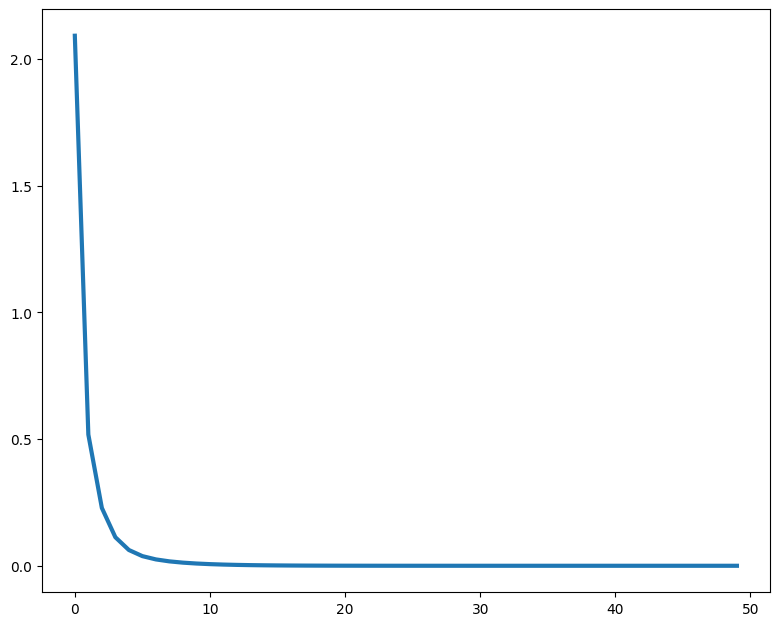

In [34]:
# строим график ошибки
fig = plt.figure(figsize=(15, 12), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(array_of_error)), array_of_error, linewidth = 3)

# 3. Попробуйте получить прогноз для какого-нибудь примера на ваше усмотрение. Попробуйте получить прогноз для какого-нибудь примера, где яркость секций светоыора измеряется от 0 до 1. Например, [0.9, 0.1, 0.7]. Сделайте выводы о полученных прогнозах сети. 

In [35]:
point = np.array([1, 0, 1])
target = 0
print('Prediction: ', point.dot(weights))

Prediction:  -1.8139514615812227e-05


In [36]:
# Пример близок к последней точке, прогноз должен быть близок к 0
point = np.array([0.9, 0.1, 0.7])
print('Prediction: ', point.dot(weights))

Prediction:  0.10001563731342974


In [37]:
# Пример близок к [ 0, 1, 1 ], прогноз должен быть близок к 1
point = np.array([0.4, 0.6, 0.6])
print('Prediction: ', point.dot(weights))

Prediction:  0.600028262807764


In [38]:
# Пример близок к [ 0, 1, 1 ], прогноз должен быть близок к 1
point = np.array([0.3, 0.8, 0.9])
print('Prediction: ', point.dot(weights))

Prediction:  0.8000047118575973


При удалении цветов от точных значений 0 и 1 предсказание так же становится менее уверенным<br/>Значение предсказания оказалось сильнее всего зависит от значения зеленого цвета.

# 4. Реализуйте полный градиентный спуск или стохастический градиентный спуск по мини-батчам (размер батча = 2) на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration.

## 4.1 Реализация алгоритма полного градиентного спуска

In [41]:
weights = np.array([0.5,0.48,-0.7])
learning_rate = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

# For plots
array_of_error = []

for iteration in range(50):

    prediction = streetlights.dot(weights) # vector of predictions for each sample
    print('Predictions: ', prediction)
    error = (prediction -  walk_vs_stop)**2 # vector of errors
    error = error.mean() # MSE
    print('Error: ', error)
    array_of_error.append(error)

    C = 2*(prediction -  walk_vs_stop) / len(prediction)
    weight_corrections = C.dot(streetlights) #получаем вектор из 3х величин для коррекции 3х весов
    print("Weight corrections: "+ str(weight_corrections))

    # Изменяем вес после полного прохода через всю обучающую выборку
    weights = weights - learning_rate*weight_corrections
    print('\n')

Predictions:  [-0.2  -0.22 -0.7   0.28 -0.22 -0.2 ]
Error:  0.6775333333333333
Weight corrections: [-0.37333333 -1.05333333 -1.42      ]


Predictions:  [-0.02066667  0.02733333 -0.558       0.56466667  0.02733333 -0.02066667]
Error:  0.3989823703703703
Weight corrections: [-0.15888889 -0.79355556 -0.99333333]


Predictions:  [ 0.09455556  0.20602222 -0.45866667  0.75924444  0.20602222  0.09455556]
Error:  0.2578368796707819
Weight corrections: [-0.01721481 -0.60957037 -0.69942222]


Predictions:  [ 0.16621926  0.33692148 -0.38872444  0.89186519  0.33692148  0.16621926]
Error:  0.18290062660374937
Weight corrections: [ 0.0747679  -0.47809728 -0.49685926]


Predictions:  [ 0.2084284   0.43441714 -0.33903852  0.98188405  0.43441714  0.2084284 ]
Error:  0.1403213414982968
Weight corrections: [ 0.13291361 -0.38309389 -0.35715447]


Predictions:  [ 0.23085248  0.50844197 -0.30332307  1.04261752  0.50844197  0.23085248]
Error:  0.11394424409100597
Weight corrections: [ 0.1681075  -0.31349951

## 4.2 Построение графика ошибки

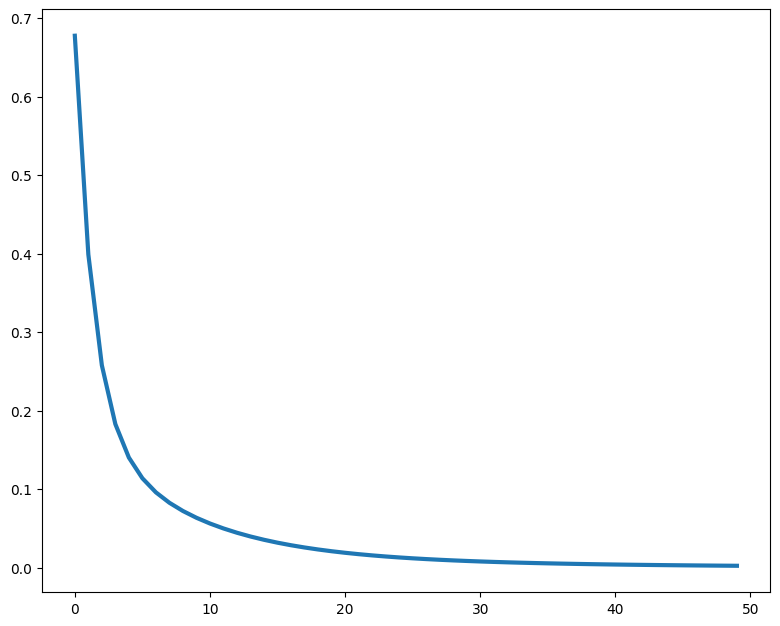

In [40]:
fig = plt.figure(figsize=(15, 12), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(array_of_error)), array_of_error, linewidth = 3)